In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
vitamin_df = pd.read_sas('./data/VID_L.xpt', format='xport')
vitamin_df

,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,5.604213e+04,58.9,5.397605e-79,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,3.743571e+04,60.5,5.397605e-79,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,8.532884e+04,39.4,5.397605e-79,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,142307.0,6.899418e+04,147.0,5.397605e-79,1.57,1.0,145.0,5.397605e-79,15.90,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8725,142309.0,4.628442e+04,17.8,5.397605e-79,1.57,1.0,16.2,5.397605e-79,0.78,5.397605e-79


In [20]:
vitamin_df.isna().sum()

SEQN           0
WTPH2YR        0
LBXVIDMS    1420
LBDVIDLC    1420
LBXVD2MS    1420
LBDVD2LC    1420
LBXVD3MS    1419
LBDVD3LC    1419
LBXVE3MS    1489
LBDVE3LC    1489
dtype: int64

In [22]:
vitamin_df = vitamin_df.dropna()
vitamin_df

,SEQN,WTPH2YR,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,130378.0,56042.129410,58.9,5.397605e-79,1.57,1.000000e+00,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,37435.705647,60.5,5.397605e-79,1.57,1.000000e+00,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,85328.844519,39.4,5.397605e-79,1.57,1.000000e+00,37.8,5.397605e-79,1.52,5.397605e-79
5,130386.0,44526.214135,96.9,5.397605e-79,1.57,1.000000e+00,95.3,5.397605e-79,5.53,5.397605e-79
6,130387.0,22746.296353,26.7,5.397605e-79,1.57,1.000000e+00,25.1,5.397605e-79,1.10,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...
8719,142303.0,47778.604939,80.6,5.397605e-79,6.05,5.397605e-79,74.5,5.397605e-79,5.64,5.397605e-79
8721,142305.0,49710.929024,93.0,5.397605e-79,1.57,1.000000e+00,91.4,5.397605e-79,7.19,5.397605e-79
8723,142307.0,68994.175834,147.0,5.397605e-79,1.57,1.000000e+00,145.0,5.397605e-79,15.90,5.397605e-79
8725,142309.0,46284.416719,17.8,5.397605e-79,1.57,1.000000e+00,16.2,5.397605e-79,0.78,5.397605e-79


In [23]:
# Define LLOD values
LLOD_VD2 = 1.57
LLOD_VD3 = 4.1
LLOD_eVD3 = 0.54

# Impute values below detection limit
vitamin_df.loc[vitamin_df['LBDVD2LC'] == 1, 'LBXVD2MS'] = LLOD_VD2 / np.sqrt(2)
vitamin_df.loc[vitamin_df['LBDVD3LC'] == 1, 'LBXVD3MS'] = LLOD_VD3 / np.sqrt(2)
vitamin_df.loc[vitamin_df['LBDVE3LC'] == 1, 'LBXVE3MS'] = LLOD_eVD3 / np.sqrt(2)

In [25]:
vitamin_df['VitaminD_Deficiency'] = np.where(vitamin_df['LBXVIDMS'] < 50, 1, 0)

In [26]:
print(vitamin_df[['LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS', 'VitaminD_Deficiency']].describe())


          LBXVIDMS     LBXVD2MS     LBXVD3MS     LBXVE3MS  VitaminD_Deficiency
count  7238.000000  7238.000000  7238.000000  7238.000000          7238.000000
mean     77.484804     3.790646    73.237557     4.875785             0.215115
std      36.151786    13.096092    36.053370     3.822397             0.410930
min       7.970000     1.110158     4.100000     0.381838             0.000000
25%      53.100000     1.110158    48.600000     2.440000             0.000000
50%      72.100000     1.110158    68.250000     3.850000             0.000000
75%      95.700000     1.110158    91.675000     6.097500             0.000000
max     424.000000   228.000000   422.000000    62.800000             1.000000


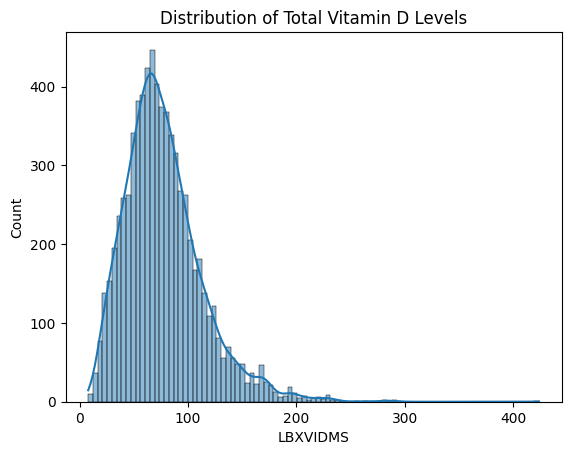

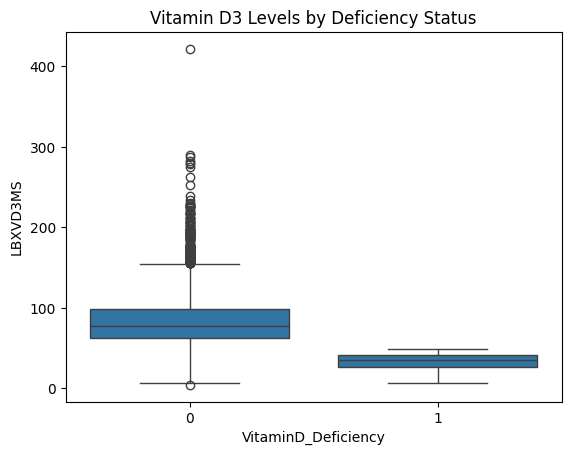

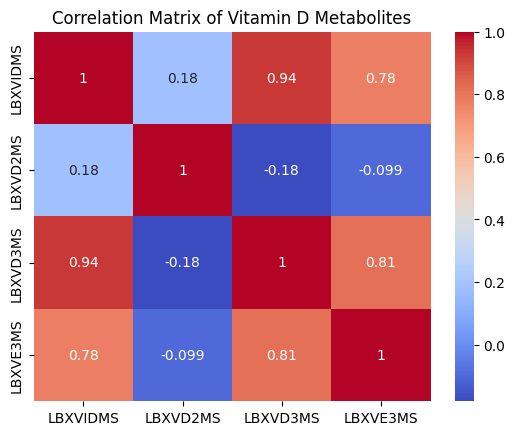

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(vitamin_df['LBXVIDMS'], kde=True)
plt.title('Distribution of Total Vitamin D Levels')
plt.show()

# Box Plot
sns.boxplot(x='VitaminD_Deficiency', y='LBXVD3MS', data=vitamin_df)
plt.title('Vitamin D3 Levels by Deficiency Status')
plt.show()

# Correlation Matrix
corr = vitamin_df[['LBXVIDMS', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vitamin D Metabolites')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

X = vitamin_df[['LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']]
y = vitamin_df['VitaminD_Deficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn import metrics

def plot_confusion_matrix(actual, predicted):

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    
    cm_display.plot()
    plt.show()

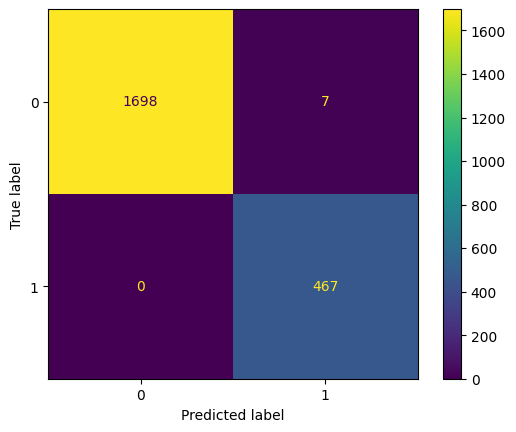

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1705
           1       0.99      1.00      0.99       467

    accuracy                           1.00      2172
   macro avg       0.99      1.00      1.00      2172
weighted avg       1.00      1.00      1.00      2172



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))